#### Importação e leitura dos dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
#df1 = pd.read_excel('C:/Users/user/Documents/housing_proj/apartment.xlsx')
#df2 = pd.read_excel('C:/Users/user/Documents/housing_proj/apartment_2.xlsx')

#df =  pd.concat([df1, df2], ignore_index = True)

In [3]:
data = pd.read_csv('C:/Users/user/Documents/housing_proj/Dataset_imoveis.csv', sep=';')

In [4]:
#df = df.drop('Unnamed: 0', axis = 1)
df = data.drop('pagina', axis=1)

In [5]:
df = df[df['extra'] != '0']

In [6]:
df.isnull().sum()

endereco    0
valor       0
detalhes    0
extra       0
dtype: int64

#### Tratamento dos dados

In [7]:
#df['preco'] = df['preco'].apply(lambda elemento: elemento.split()[1].replace('.', ''))
#df['preco'] = pd.to_numeric(df['preco'])

In [8]:
df['area'] = df['detalhes'].apply(lambda elemento: elemento.split()[0])
df['quartos'] = df['detalhes'].apply(lambda elemento: elemento.split()[2])
df['banheiros'] = df['detalhes'].apply(lambda elemento: elemento.split()[4])
df['garagem'] = df['detalhes'].apply(lambda elemento: elemento.split()[6])

In [9]:
df.head(3)

,endereco,valor,detalhes,extra,area,quartos,banheiros,garagem
0,"Rua Coelho Neto, 4 - Laranjeiras, Rio de Janei...",1100000.0,\n\n\n 110\n \n\n ...,\nPlayground\nElevador\nPortaria 24h\nAr-condi...,110,2,4,2
2,"Rua José Américo de Almeida, 688 - Recreio Dos...",1600000.0,\n\n\n 173\n \n\n ...,\nMobiliado\nElevador\nCondomínio fechado\nAce...,173,3,5,6
3,"Rua General Barbosa Lima, 34 - Copacabana, Rio...",1980000.0,\n\n\n 112\n \n\n ...,\nAceita animais\nAr-condicionado\nMobiliado\n...,112,3,2,--


#### Tratando as novas colunas

In [10]:
df['garagem'] = df['garagem'].apply(lambda x: '0' if x == '--' else x)

In [11]:
df = df.drop(df[df['area'].apply(lambda x: '1' if '-' in x else '0') == '1'].index.to_list(), axis = 0)

In [12]:
df = df.drop(df[df['banheiros'].apply(lambda x: '1' if '-' in x else '0') == '1'].index.to_list(), axis = 0)

In [13]:
df = df.drop(df[df['garagem'].apply(lambda x: '1' if '-' in x else '0') == '1'].index.to_list(), axis = 0)

#### Convertendo para numerico

In [14]:
df['area'] = pd.to_numeric(df['area'])
df['quartos'] = pd.to_numeric(df['quartos'])
df['banheiros'] = pd.to_numeric(df['banheiros'])
df['garagem'] = pd.to_numeric(df['garagem'])

#df = df.drop('detalhes', axis=1)

In [15]:
x = []
for i in df['extra']:
    x.append(i.lower())
df['extra'] = x

In [16]:
df['salao_de_festas'] = df['extra'].apply(lambda x: 1 if 'festas' in x else 0)
df['aceita_animais'] = df['extra'].apply(lambda x: 1 if 'animais' in x else 0)
df['ar_condicionado'] = df['extra'].apply(lambda x: 1 if 'condicionado' in x else 0)
df['condominio_fechado'] = df['extra'].apply(lambda x: 1 if 'condomínio' in x else 0)
df['churrasqueira'] = df['extra'].apply(lambda x: 1 if 'churrasqueira' in x else 0)
df['academia'] = df['extra'].apply(lambda x: 1 if 'academia' in x else 0)
df['portao_eletronico'] = df['extra'].apply(lambda x: 1 if 'eletrônico' in x else 0)
df['piscina'] = df['extra'].apply(lambda x: 1 if 'piscina' in x else 0)

df = df.drop(['extra', 'detalhes'], axis=1)

### Análise exploratória

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

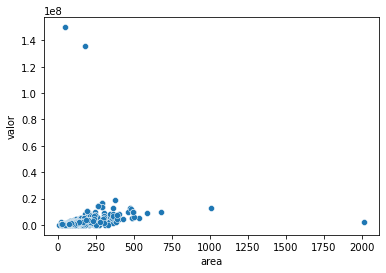

In [18]:
sns.scatterplot(data=df, x='area', y='valor');

In [19]:
df = df.drop(2077, axis = 0)

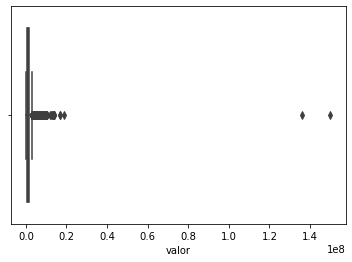

In [20]:
sns.boxplot(data=df, x = 'valor');

In [21]:
round(df.describe(), 2)

,valor,area,quartos,banheiros,garagem,salao_de_festas,aceita_animais,ar_condicionado,condominio_fechado,churrasqueira,academia,portao_eletronico,piscina
count,2.536000e+03,2536.00,2536.00,2536.00,2536.00,2536.0,2536.00,2536.00,2536.00,2536.00,2536.00,2536.00,2536.00
mean,1.366445e+06,110.75,2.59,2.47,1.28,0.1,0.46,0.31,0.51,0.39,0.26,0.09,0.43
std,4.288913e+06,68.48,0.83,1.11,0.99,0.3,0.50,0.46,0.50,0.49,0.44,0.29,0.50
min,6.000000e+02,10.00,1.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.600000e+05,70.00,2.00,2.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,8.300000e+05,90.00,3.00,2.00,1.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,1.472250e+06,128.00,3.00,3.00,2.00,0.0,1.00,1.00,1.00,1.00,1.00,0.00,1.00
max,1.500000e+08,1006.00,6.00,8.00,11.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00


* É possível verificar que o menor valor para o apartamento é de 600 reais. Isso sugere que possa ser um imóvel de aluguel.
* O maior valor é 150 milhões, o que supera os valores de um apartamento, tornando-se uma mansão.
* 10 metros quadrados é a menor área cujo valor também é estranho.
* 1006 metros quadrados é a maior área, valor que está fora dos padrões para um apartamento.
* Verificar qual apartamento tem 11 garagens, 8 banheiros.

In [37]:
column = df['valor']
q3 = column.quantile(0.75)
q1 = column.quantile(0.25)

iqr = q3 - q1

lim_sup = q3 + (1.5 * iqr)
lim_inf = q1 - (1.5 * iqr)

In [44]:
df = df[df['valor'] <= lim_sup]

df = df[df['valor'] >= 150000]

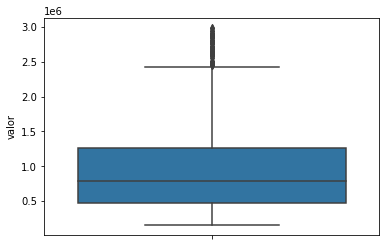

In [46]:
sns.boxplot(data=df, y = 'valor');

In [54]:
column = df['area']
q3 = column.quantile(0.75)
q1 = column.quantile(0.25)

iqr = q3 - q1

lim_sup = q3 + (1.5 * iqr)
lim_inf = q1 - (1.5 * iqr)

In [57]:
df = df[df['area'] <= lim_sup]

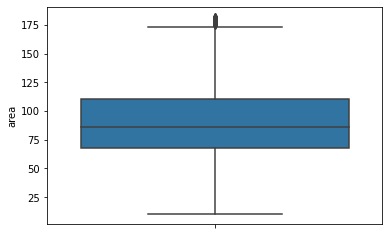

In [58]:
sns.boxplot(data=df, y = 'area');

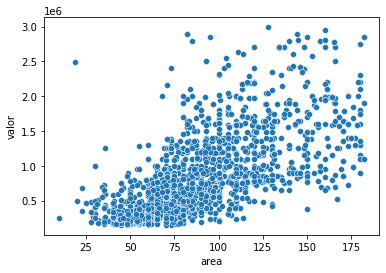

In [61]:
sns.scatterplot(data=df,y='valor',x='area');

In [63]:
df = df[df['area']>=25]

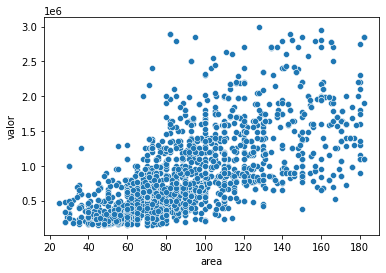

In [64]:
sns.scatterplot(data=df,y='valor',x='area');

In [66]:
variables = df.drop(columns='valor')
target = df['valor']

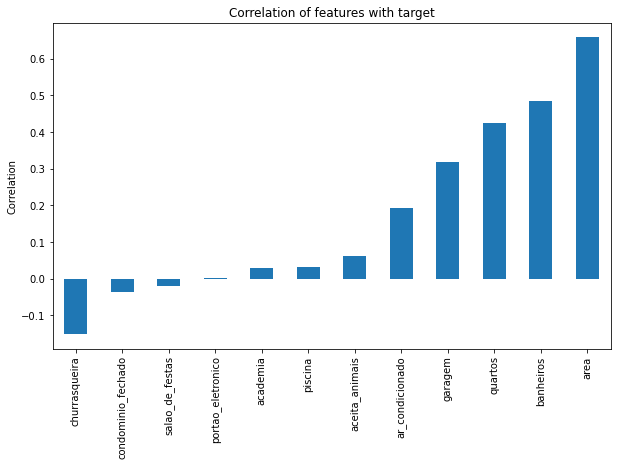

In [74]:
variables.corrwith(target).sort_values().plot(kind='bar', figsize = (10,6))
plt.title('Correlation of features with target')
plt.ylabel('Correlation');

In [75]:
df = df.drop(columns=['portao_eletronico'])

## Modelagem

In [79]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['valor','endereco'])
y = df['valor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [80]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(X_train, y_train)

In [84]:
prediction = model.predict(X_test)

In [85]:
from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y_test, prediction)))
print('R2:', np.sqrt(metrics.r2_score(y_test, prediction)))

RMSE: 406236.6833528825
MAE: 542.9934235434009
R2: 0.7048949214657272
